**Assignment 9: Implementation of Principal Component Analysis**

Name: Poorani M

Admission Number: 21je0661

Date:10th April, 2024


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
#loading data:
breast = load_breast_cancer()
#data shape
breast_data = breast.data
breast_data.shape

(569, 30)

In [ ]:
#target shape
breast_labels = breast.target
breast_labels.shape

(569,)

In [ ]:
#reshaping data
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [ ]:
breast_dataset = pd.DataFrame(final_breast_data)

In [ ]:
#features of the data set
features = breast.feature_names
print("FEATURES\n")
for i in range (0,30):
  print(features[i],end=',')
  if i%5==0 and i!=0:
    print('\n')
features_labels = np.append(features,'label')

FEATURES

mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,

mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,

texture error,perimeter error,area error,smoothness error,compactness error,

concavity error,concave points error,symmetry error,fractal dimension error,worst radius,

worst texture,worst perimeter,worst area,worst smoothness,worst compactness,

worst concavity,worst concave points,worst symmetry,worst fractal dimension,

In [ ]:
#data set
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
#standardizing the data:
x = breast_dataset.loc[:, features].values
x.shape

(569, 30)

In [ ]:
#standardization-normal distribution

x = StandardScaler().fit_transform(x)

# Compute covariance matrix
cov_matrix = np.cov(x, rowvar=False)

# Perform eigendecomposition
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
eigen_values=np.abs(eigen_values)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_values_sorted = eigen_values[sorted_indices]
eigen_vectors_sorted = eigen_vectors[:, sorted_indices]

for i in range(2):
    max_abs_index = np.argmax(np.abs(eigen_vectors_sorted[:, i]))
    eigen_vectors_sorted[:, i] *= np.sign(eigen_vectors_sorted[max_abs_index, i])

# Select number of principal components
n_components = 2

# Project data onto principal components
principal_components = eigen_vectors_sorted[:, :n_components]
X_pca = np.dot(x, principal_components)

#X_pca =X_pca/np.sqrt(np.abs(eigen_values_sorted[:n_components]))

# Print the first few rows of the transformed data
print(X_pca[:10])

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 [ 7.1229532  10.27558912]
 [ 3.93530207 -1.94807157]
 [ 2.38024715  3.9499289 ]
 [ 2.23888331 -2.69003128]
 [ 2.1432985   2.34024401]
 [ 3.17492429  3.39181295]
 [ 6.35174679  7.72717407]]


<Figure size 640x480 with 0 Axes>

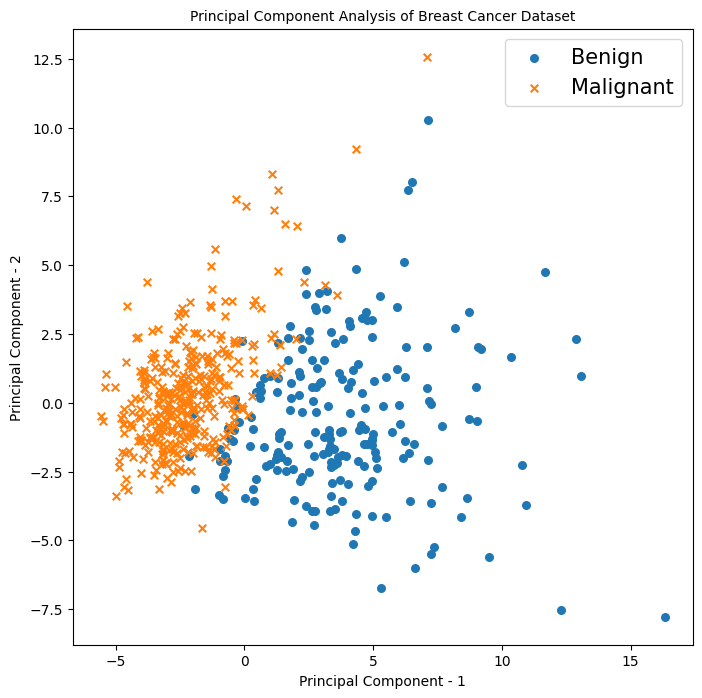

In [ ]:
plt.figure()
plt.figure(figsize=(8,8))
plt.xlabel('Principal Component - 1',fontsize=10)
plt.ylabel('Principal Component - 2',fontsize=10)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=10)
targets = [0, 1]
colors = ['o', 'x']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(X_pca[indicesToKeep,0], X_pca[indicesToKeep, 1], marker= color, s = 30)

plt.legend(['Benign', 'Malignant'],prop={'size': 15})

In [ ]:
principal_breast_Df = pd.DataFrame(X_pca, columns =['1', '2'])
principal_breast_Df.head()

,1,2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [ ]:
#using logistic regression to predict the data
#test train split:
res = train_test_split(principal_breast_Df, breast_dataset['label'],train_size=0.65,test_size=0.35)
train_data, test_data, train_labels, test_labels = res

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_data,train_labels)

LogisticRegression()

In [ ]:
predict=logisticRegr.predict(test_data)

In [ ]:
logisticRegr.score(test_data, test_labels)

0.955

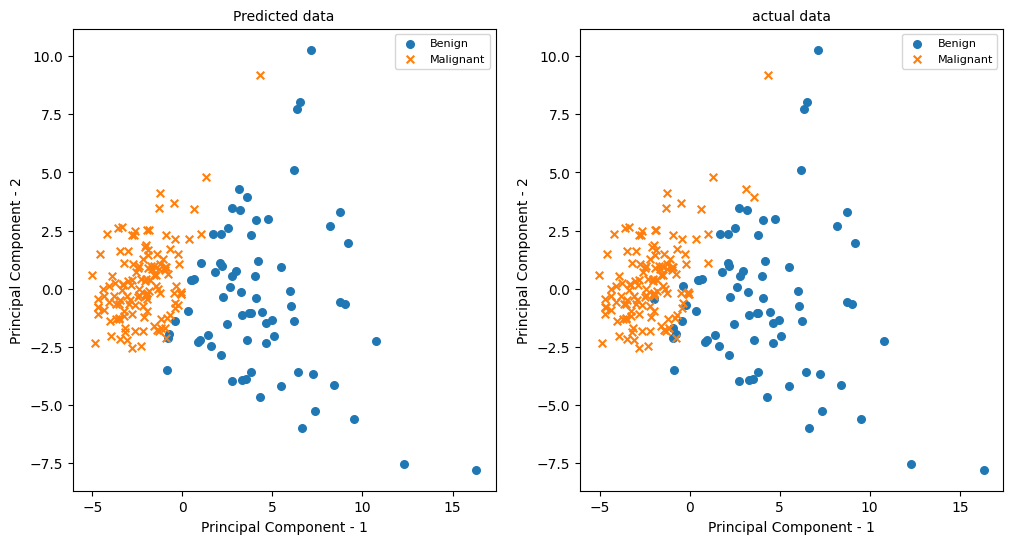

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

plt.xlabel('Principal Component - 1',fontsize=10)
plt.ylabel('Principal Component - 2',fontsize=10)
plt.title("Predicted data",fontsize=10)
targets = [0, 1]
colors = ['o', 'x']
for target, color in zip(targets,colors):
    indicesToKeep = predict == target
    plt.scatter(test_data.loc[indicesToKeep, '1'], test_data.loc[indicesToKeep, '2'], marker = color, s = 30)

plt.legend(['Benign', 'Malignant'],prop={'size': 8})

plt.subplot(1,2,2)
plt.xlabel('Principal Component - 1',fontsize=10)
plt.ylabel('Principal Component - 2',fontsize=10)
plt.title("actual data",fontsize=10)
targets = [0, 1]
colors = ['o', 'x']
for target, color in zip(targets,colors):
    indicesToKeep = test_labels == target
    plt.scatter(test_data.loc[indicesToKeep, '1'], test_data.loc[indicesToKeep, '2'], marker = color, s = 30)

plt.legend(['Benign', 'Malignant'],prop={'size': 8})